<a href="https://colab.research.google.com/github/Statistically-Inclined/NLP-Tutorial/blob/main/Text_Numerical_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [96]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [97]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [98]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [99]:
df_fake['label'] = 1
df_true['label'] = 0

In [100]:
df = df_fake.append(df_true)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1

In [101]:
df.tail()

title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  label  
21412  August 22, 2017       0  
21413  August 22, 2017       0  
21414  August 22, 2017       0  
21415  August 22, 2017       0  
21416  August 22, 2017       0

In [102]:
df.reset_index(inplace=True)
df.tail()

index                                              title  \
44893  21412  'Fully committed' NATO backs new U.S. approach...   
44894  21413  LexisNexis withdrew two products from Chinese ...   
44895  21414  Minsk cultural hub becomes haven from authorities   
44896  21415  Vatican upbeat on possibility of Pope Francis ...   
44897  21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  label  
44893  August 22, 2017       0  
44894  August 22, 2017       0  
44895  August 22, 2017       0  
44896  August 22, 2017       0  
44897  August 22, 2017       0

In [103]:
df.drop('index', axis=1, inplace=True)
df.tail()

title  \
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  label  
44893  August 22, 2017       0  
44894  August 22, 2017       0  
44895  August 22, 2017       0  
44896  August 22, 2017       0  
44897  August 22, 2017       0

In [104]:
print(df_fake.shape, df_true.shape, df.shape)

(23481, 5) (21417, 5) (44898, 5)


### Handling the Date-Time Category

In [105]:
# Error due to incorrect input at date column
# df['date'] = pd.to_datetime(df['date'])

In [106]:
df['date_len'] = df['date'].apply(len)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  date_len  
0  December 31, 2017      1        17  
1  December 31, 2017      1        17  
2  December 30, 2017      1        17  
3  December 29, 2017      1        17  
4  December 25, 2017      1        17

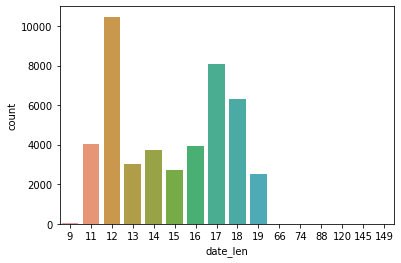

In [107]:
sns.countplot(df['date_len'])

In [108]:
df[df['date_len'] > 19]

title  \
9358   https://100percentfedup.com/served-roy-moore-v...   
15507  https://100percentfedup.com/video-hillary-aske...   
15508  https://100percentfedup.com/12-yr-old-black-co...   
15839  https://fedup.wpengine.com/wp-content/uploads/...   
15840  https://fedup.wpengine.com/wp-content/uploads/...   
17432  https://fedup.wpengine.com/wp-content/uploads/...   
17433  https://fedup.wpengine.com/wp-content/uploads/...   
18933                                           Homepage   
21869  https://fedup.wpengine.com/wp-content/uploads/...   
21870  https://fedup.wpengine.com/wp-content/uploads/...   

                                                    text          subject  \
9358   https://100percentfedup.com/served-roy-moore-v...         politics   
15507  https://100percentfedup.com/video-hillary-aske...         politics   
15508  https://100percentfedup.com/12-yr-old-black-co...         politics   
15839  https://fedup.wpengine.com/wp-content/uploads/...         politics   
15840  https://fedup.wpengine.com/wp-content/uploads/...         politics   
17432  https://fedup.wpengine.com/wp-content/uploads/...  Government News   
17433  https://fedup.wpengine.com/wp-content/uploads/...  Government News   
18933  [vc_row][vc_column width= 1/1 ][td_block_trend...        left-news   
21869  https://fedup.wpengine.com/wp-content/uploads/...        left-news   
21870  https://fedup.wpengine.com/wp-content/uploads/...        left-news   

                                                    date  label  date_len  
9358   https://100percentfedup.com/served-roy-moore-v...      1       145  
15507  https://100percentfedup.com/video-hillary-aske...      1        88  
15508  https://100percentfedup.com/12-yr-old-black-co...      1       149  
15839  https://fedup.wpengine.com/wp-content/uploads/...      1        74  
15840  https://fedup.wpengine.com/wp-content/uploads/...      1        66  
17432  https://fedup.wpengine.com/wp-content/uploads/...      1        74  
17433  https://fedup.wpengine.com/wp-content/uploads/...      1        66  
18933  MSNBC HOST Rudely Assumes Steel Worker Would N...      1       120  
21869  https://fedup.wpengine.com/wp-content/uploads/...      1        74  
21870  https://fedup.wpengine.com/wp-content/uploads/...      1        66

In [109]:
indices = df[df['date_len'] > 19].index.to_list()
indices

[9358, 15507, 15508, 15839, 15840, 17432, 17433, 18933, 21869, 21870]

In [110]:
mode = df['date'].mode()
mode[0]

'December 20, 2017 '

In [111]:
df.loc[indices, 'date'] = mode[0]
df.loc[indices, 'date']

9358     December 20, 2017 
15507    December 20, 2017 
15508    December 20, 2017 
15839    December 20, 2017 
15840    December 20, 2017 
17432    December 20, 2017 
17433    December 20, 2017 
18933    December 20, 2017 
21869    December 20, 2017 
21870    December 20, 2017 
Name: date, dtype: object

In [112]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     44898 non-null  object        
 1   text      44898 non-null  object        
 2   subject   44898 non-null  object        
 3   date      44898 non-null  datetime64[ns]
 4   label     44898 non-null  int64         
 5   date_len  44898 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.1+ MB


In [113]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [114]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31   
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31   
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30   
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29   
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25   

   label  date_len  day  month  year  
0      1        17   31     12  2017  
1      1        17   31     12  2017  
2      1        17   30     12  2017  
3      1        17   29     12  2017  
4      1        17   25     12  2017

In [115]:
df.drop('date', axis=1,inplace=True)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...    News      1        17   
1  House Intelligence Committee Chairman Devin Nu...    News      1        17   
2  On Friday, it was revealed that former Milwauk...    News      1        17   
3  On Christmas day, Donald Trump announced that ...    News      1        17   
4  Pope Francis used his annual Christmas Day mes...    News      1        17   

   day  month  year  
0   31     12  2017  
1   31     12  2017  
2   30     12  2017  
3   29     12  2017  
4   25     12  2017

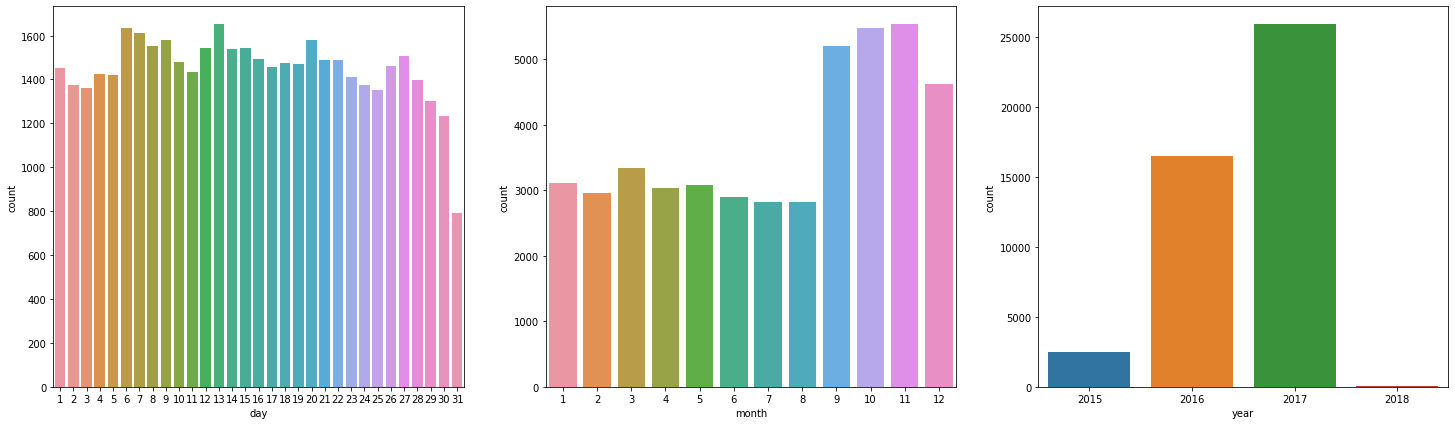

In [116]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.countplot(df['day'])
plt.subplot(1,3,2)
sns.countplot(df['month'])
plt.subplot(1,3,3)
sns.countplot(df['year'])

### Feature Extraction

In [117]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...    News      1        17   
1  House Intelligence Committee Chairman Devin Nu...    News      1        17   
2  On Friday, it was revealed that former Milwauk...    News      1        17   
3  On Christmas day, Donald Trump announced that ...    News      1        17   
4  Pope Francis used his annual Christmas Day mes...    News      1        17   

   day  month  year  
0   31     12  2017  
1   31     12  2017  
2   30     12  2017  
3   29     12  2017  
4   25     12  2017

In [118]:
df['title_len'] = df['title'].apply(len)
df['text_len'] = df['text'].apply(len)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...    News      1        17   
1  House Intelligence Committee Chairman Devin Nu...    News      1        17   
2  On Friday, it was revealed that former Milwauk...    News      1        17   
3  On Christmas day, Donald Trump announced that ...    News      1        17   
4  Pope Francis used his annual Christmas Day mes...    News      1        17   

   day  month  year  title_len  text_len  
0   31     12  2017         79      2893  
1   31     12  2017         69      1898  
2   30     12  2017         90      3597  
3   29     12  2017         78      2774  
4   25     12  2017         70      2346

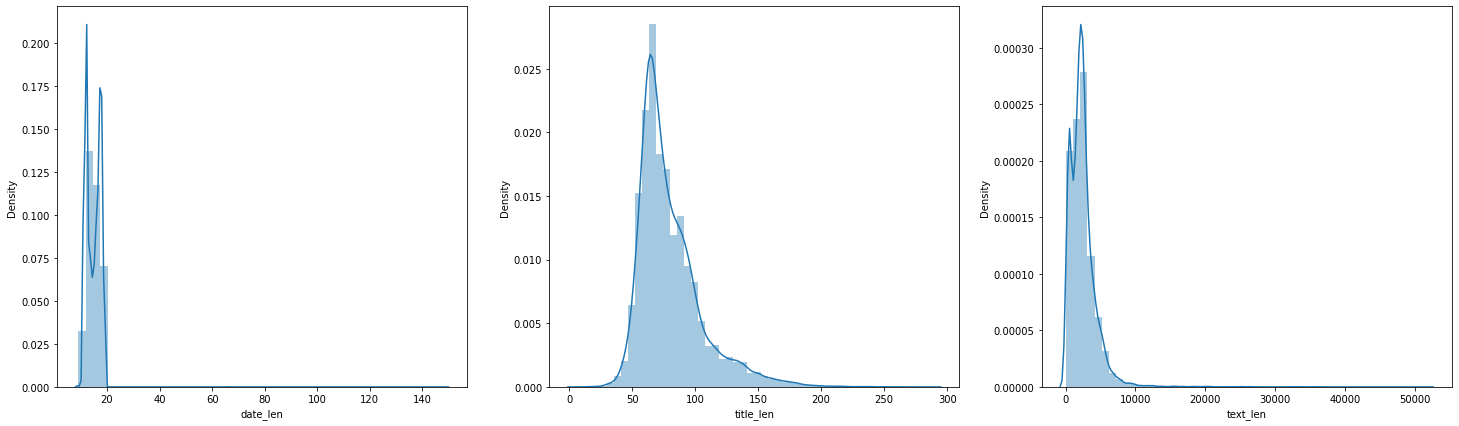

In [119]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.distplot(df['date_len'])
plt.subplot(1,3,2)
sns.distplot(df['title_len'])
plt.subplot(1,3,3)
sns.distplot(df['text_len'])

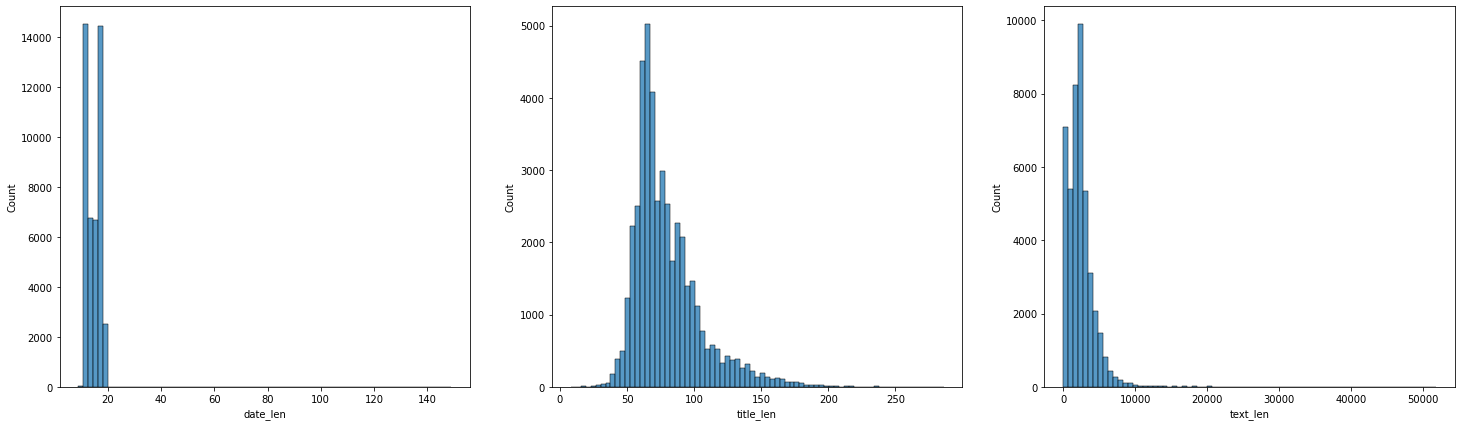

In [120]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(df['date_len'], bins=75)
plt.subplot(1,3,2)
sns.histplot(df['title_len'], bins=75)
plt.subplot(1,3,3)
sns.histplot(df['text_len'], bins=75)

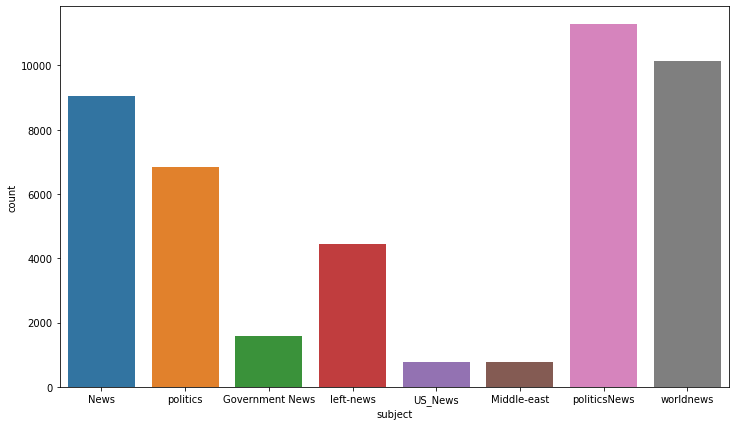

In [121]:
plt.figure(figsize=(12,7))
sns.countplot(df['subject'])

In [122]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...    News      1        17   
1  House Intelligence Committee Chairman Devin Nu...    News      1        17   
2  On Friday, it was revealed that former Milwauk...    News      1        17   
3  On Christmas day, Donald Trump announced that ...    News      1        17   
4  Pope Francis used his annual Christmas Day mes...    News      1        17   

   day  month  year  title_len  text_len  
0   31     12  2017         79      2893  
1   31     12  2017         69      1898  
2   30     12  2017         90      3597  
3   29     12  2017         78      2774  
4   25     12  2017         70      2346

In [123]:
df_subject = pd.get_dummies(df['subject'])
df_subject.head()

Government News  Middle-east  News  US_News  left-news  politics  \
0                0            0     1        0          0         0   
1                0            0     1        0          0         0   
2                0            0     1        0          0         0   
3                0            0     1        0          0         0   
4                0            0     1        0          0         0   

   politicsNews  worldnews  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0

In [124]:
df_year = pd.get_dummies(df['year'])
df_year.head()

2015  2016  2017  2018
0     0     0     1     0
1     0     0     1     0
2     0     0     1     0
3     0     0     1     0
4     0     0     1     0

In [125]:
df_month = pd.get_dummies(df['month'])
df_month.head()

1   2   3   4   5   6   7   8   9   10  11  12
0   0   0   0   0   0   0   0   0   0   0   0   1
1   0   0   0   0   0   0   0   0   0   0   0   1
2   0   0   0   0   0   0   0   0   0   0   0   1
3   0   0   0   0   0   0   0   0   0   0   0   1
4   0   0   0   0   0   0   0   0   0   0   0   1

In [126]:
df_day = pd.get_dummies(df['day'])
df_day.head()

1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   

   29  30  31  
0   0   0   1  
1   0   0   1  
2   0   1   0  
3   1   0   0  
4   0   0   0  

[5 rows x 31 columns]

In [127]:
df = pd.concat([df, df_subject, df_year, df_month, df_day], axis=1)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...    News      1        17   
1  House Intelligence Committee Chairman Devin Nu...    News      1        17   
2  On Friday, it was revealed that former Milwauk...    News      1        17   
3  On Christmas day, Donald Trump announced that ...    News      1        17   
4  Pope Francis used his annual Christmas Day mes...    News      1        17   

   day  month  year  title_len  text_len  ...  22  23  24  25  26  27  28  29  \
0   31     12  2017         79      2893  ...   0   0   0   0   0   0   0   0   
1   31     12  2017         69      1898  ...   0   0   0   0   0   0   0   0   
2   30     12  2017         90      3597  ...   0   0   0   0   0   0   0   0   
3   29     12  2017         78      2774  ...   0   0   0   0   0   0   0   1   
4   25     12  2017         70      2346  ...   0   0   0   1   0   0   0   0   

   30  31  
0   0   1  
1   0   1  
2   1   0  
3   0   0  
4   0   0  

[5 rows x 65 columns]

In [128]:
print(df.columns.to_list())

['title', 'text', 'subject', 'label', 'date_len', 'day', 'month', 'year', 'title_len', 'text_len', 'Government News', 'Middle-east', 'News', 'US_News', 'left-news', 'politics', 'politicsNews', 'worldnews', 2015, 2016, 2017, 2018, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [129]:
df.drop(['subject', 'day', 'month', 'year'], axis=1, inplace=True)
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...      1        17   
1  House Intelligence Committee Chairman Devin Nu...      1        17   
2  On Friday, it was revealed that former Milwauk...      1        17   
3  On Christmas day, Donald Trump announced that ...      1        17   
4  Pope Francis used his annual Christmas Day mes...      1        17   

   title_len  text_len  Government News  Middle-east  News  US_News  ...  22  \
0         79      2893                0            0     1        0  ...   0   
1         69      1898                0            0     1        0  ...   0   
2         90      3597                0            0     1        0  ...   0   
3         78      2774                0            0     1        0  ...   0   
4         70      2346                0            0     1        0  ...   0   

   23  24  25  26  27  28  29  30  31  
0   0   0   0   0   0   0   0   0   1  
1   0   0   0   0   0   0   0   0   1  
2   0   0   0   0   0   0   0   1   0  
3   0   0   0   0   0   0   1   0   0  
4   0   0   1   0   0   0   0   0   0  

[5 rows x 61 columns]

In [130]:
print(df.keys().to_list())

['title', 'text', 'label', 'date_len', 'title_len', 'text_len', 'Government News', 'Middle-east', 'News', 'US_News', 'left-news', 'politics', 'politicsNews', 'worldnews', 2015, 2016, 2017, 2018, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [131]:
df.shape

(44898, 61)

In [132]:
import re
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Flatten, LSTM
from keras.layers.merge import Concatenate
from keras.layers import GlobalMaxPooling1D
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers.core import Activation, Dropout, Dense

In [133]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    return sentence

In [134]:
X = []

sentences = list(df["text"])

for sen in sentences:
    X.append(preprocess_text(sen))

y = df['label']

In [135]:
X

['Donald Trump just couldn wish all Americans Happy New Year and leave it at that Instead he had to give shout out to his enemies haters and the very dishonest fake news media The former reality show star had just one job to do and he couldn do it As our Country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest Fake News Media Happy and Healthy New Year President Angry Pants tweeted will be great year for America As our Country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest Fake News Media Happy and Healthy New Year will be great year for America Donald Trump realDonaldTrump December Trump tweet went down about as welll as you expect What kind of president sends New Year greeting like this despicable petty infantile gibberish Only Trump His lack of decency won even allow him to rise above the gutter long enough to wish the American citizens happ

In [136]:
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: label, Length: 44898, dtype: int64

In [137]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

In [138]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Keras provides numpy utility library, which provides functions to perform actions on numpy arrays. Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

Syntax: tf.keras.utils.to_categorical(y, num_classes=None, dtype=”float32″)

In [169]:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [170]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [171]:
y_train.shape

(35918,)

In [172]:
y_test.shape

(8980,)

In [173]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [174]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

### Load the built-in GloVe word embeddings.

### GloVe stands for Global Vectors for word representation. It is an unsupervised learning algorithm aiming to generate word embeddings by aggregating global word co-occurrence matrices from a given corpus.   

In [175]:
# !unzip glove.6B.txt.zip

In [176]:
# from numpy import array
# from numpy import asarray
# from numpy import zeros

# embeddings_dictionary = dict()

# glove_file = open('glove.6B.100d.txt', encoding="utf8")

# for line in glove_file:
#     records = line.split()
#     word = records[0]
#     vector_dimensions = asarray(records[1:], dtype='float32')
#     embeddings_dictionary [word] = vector_dimensions

# glove_file.close()

In [177]:
# embedding_matrix = zeros((vocab_size, 100))
# for word, index in tokenizer.word_index.items():
#     embedding_vector = embeddings_dictionary.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[index] = embedding_vector

In [178]:
# deep_inputs = Input(shape=(maxlen,))
# embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### Solving using LSTM without GloVe

In [183]:
embedding_vector_features=100 # 40 features i.e, the sentence length is 20, &  we are converting it into 40 dimensions/features
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          10566200  
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,683,577
Trainable params: 10,683,577
Non-trainable params: 0
_________________________________________________________________


In [184]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          10566200  
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,683,577
Trainable params: 10,683,577
Non-trainable params: 0
_________________________________________________________________
None


In [186]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 178s 778ms/step - loss: 0.2448 - accuracy: 0.9135 - val_loss: 0.4931 - val_accuracy: 0.8593
Epoch 2/10
225/225 [==============================] - 176s 781ms/step - loss: 0.1852 - accuracy: 0.9401 - val_loss: 0.1507 - val_accuracy: 0.9500
Epoch 3/10
225/225 [==============================] - 175s 778ms/step - loss: 0.1428 - accuracy: 0.9564 - val_loss: 0.2008 - val_accuracy: 0.9460
Epoch 4/10
225/225 [==============================] - 173s 770ms/step - loss: 0.2625 - accuracy: 0.8965 - val_loss: 0.3424 - val_accuracy: 0.8257
Epoch 5/10
225/225 [==============================] - 185s 822ms/step - loss: 0.2246 - accuracy: 0.9079 - val_loss: 0.1478 - val_accuracy: 0.9521
Epoch 6/10
225/225 [==============================] - 200s 888ms/step - loss: 0.1411 - accuracy: 0.9549 - val_loss: 0.1451 - val_accuracy: 0.9578
Epoch 7/10
225/225 [==============================] - 191s 850ms/step - loss: 0.1045 - accuracy: 0.9654 - val_loss: 0.2371 -

In [188]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

281/281 [==============================] - 16s 58ms/step - loss: 0.2416 - accuracy: 0.8972
Test Score: 0.2415529191493988
Test Accuracy: 0.8972160220146179


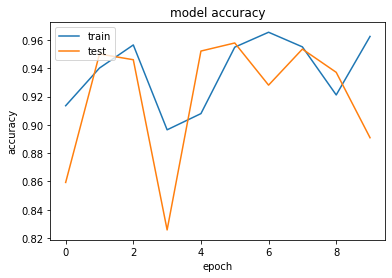

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

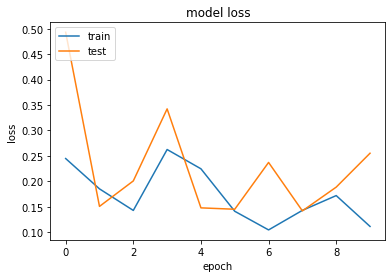

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Creating a Model with Numerical Information Only

In [187]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...      1        17   
1  House Intelligence Committee Chairman Devin Nu...      1        17   
2  On Friday, it was revealed that former Milwauk...      1        17   
3  On Christmas day, Donald Trump announced that ...      1        17   
4  Pope Francis used his annual Christmas Day mes...      1        17   

   title_len  text_len  Government News  Middle-east  News  US_News  ...  22  \
0         79      2893                0            0     1        0  ...   0   
1         69      1898                0            0     1        0  ...   0   
2         90      3597                0            0     1        0  ...   0   
3         78      2774                0            0     1        0  ...   0   
4         70      2346                0            0     1        0  ...   0   

   23  24  25  26  27  28  29  30  31  
0   0   0   0   0   0   0   0   0   1  
1   0   0   0   0   0   0   0   0   1  
2   0   0   0   0   0   0   0   1   0  
3   0   0   0   0   0   0   1   0   0  
4   0   0   1   0   0   0   0   0   0  

[5 rows x 61 columns]

In [194]:
X = df.drop(['title', 'text', 'label'], axis=1)
y = df['label']

In [195]:
X.shape, y.shape

((44898, 58), (44898,))

In [196]:
X.head()

date_len  title_len  text_len  Government News  Middle-east  News  US_News  \
0        17         79      2893                0            0     1        0   
1        17         69      1898                0            0     1        0   
2        17         90      3597                0            0     1        0   
3        17         78      2774                0            0     1        0   
4        17         70      2346                0            0     1        0   

   left-news  politics  politicsNews  ...  22  23  24  25  26  27  28  29  30  \
0          0         0             0  ...   0   0   0   0   0   0   0   0   0   
1          0         0             0  ...   0   0   0   0   0   0   0   0   0   
2          0         0             0  ...   0   0   0   0   0   0   0   0   1   
3          0         0             0  ...   0   0   0   0   0   0   0   1   0   
4          0         0             0  ...   0   0   0   1   0   0   0   0   0   

   31  
0   1  
1   1  
2   0  
3   0  
4   0  

[5 rows x 58 columns]

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [200]:
X_train.shape, X_test.shape

((35918, 58), (8980, 58))

In [204]:
print("\nX_train : ",X_train)
print("\nX_test : ",X_test)


X_train :  [[ 1.09064247  0.11199339 -0.02611489 ... -0.17429724  5.9490406
  -0.13490494]
 [ 1.09064247 -1.37982798  1.14833945 ... -0.17429724 -0.16809433
  -0.13490494]
 [ 1.09064247 -0.0842989  -0.9200819  ... -0.17429724 -0.16809433
  -0.13490494]
 ...
 [-0.28468149 -0.94798495  1.31414477 ... -0.17429724 -0.16809433
  -0.13490494]
 [ 0.74681148 -0.75169266  0.09547567 ... -0.17429724 -0.16809433
  -0.13490494]
 [-0.97234347  0.77938716  0.31286487 ... -0.17429724 -0.16809433
  -0.13490494]]

X_test :  [[-0.62851248 -0.24133272 -0.09934558 ... -0.17429724 -0.16809433
  -0.13490494]
 [ 0.0591495  -0.43762501 -0.42911393 ... -0.17429724 -0.16809433
  -0.13490494]
 [ 0.74681148  0.03347647 -0.78375309 ... -0.17429724 -0.16809433
  -0.13490494]
 ...
 [-1.31617446  1.60381475  0.1198859  ... -0.17429724 -0.16809433
  -0.13490494]
 [-0.97234347  0.30828567  0.54176832 ... -0.17429724 -0.16809433
  -0.13490494]
 [ 0.0591495  -0.12355735 -0.43648306 ... -0.17429724 -0.16809433
  -0.13490

In [220]:
model1 = Sequential()
model1.add(Dense(units=58, activation='relu'))
model1.add(Dense(units=29, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=15, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [221]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [225]:
model1.build(X_train.shape)
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (35918, 58)               3422      
                                                                 
 dense_22 (Dense)            (35918, 29)               1711      
                                                                 
 dropout_5 (Dropout)         (35918, 29)               0         
                                                                 
 dense_23 (Dense)            (35918, 15)               450       
                                                                 
 dense_24 (Dense)            (35918, 1)                16        
                                                                 
Total params: 5,599
Trainable params: 5,599
Non-trainable params: 0
_________________________________________________________________


In [226]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 1s 3ms/step - loss: 0.1800 - accuracy: 0.9287 - val_loss: 0.0080 - val_accuracy: 0.9997
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 0.9997 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 8.7713e-04 - accuracy: 0.9999 - val_loss: 5.7981e-05 - val_accuracy: 1.0000
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 3.3334e-04 - accuracy: 1.0000 - val_loss: 2.2245e-05 - val_accuracy: 1.0000
Epoch 5/10
225/225 [==============================] - 1s 3ms/step - loss: 2.4721e-04 - accuracy: 1.0000 - val_loss: 1.2216e-05 - val_accuracy: 1.0000
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 1.2223e-04 - accuracy: 1.0000 - val_loss: 6.7060e-06 - val_accuracy: 1.0000
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 9.1220e-05 - accuracy: 1.0000 - val_loss: 

In [228]:
score = model1.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

281/281 [==============================] - 0s 1ms/step - loss: 1.4122e-06 - accuracy: 1.0000
Test Score: 1.4121632148089702e-06
Test Accuracy: 1.0


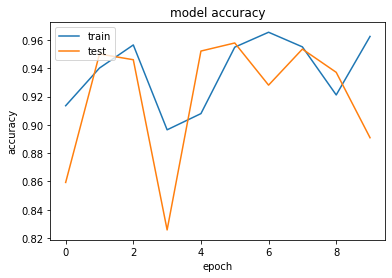

In [229]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

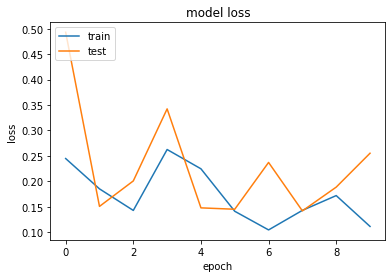

In [230]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Concatenating two models

In [231]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  label  date_len  \
0  Donald Trump just couldn t wish all Americans ...      1        17   
1  House Intelligence Committee Chairman Devin Nu...      1        17   
2  On Friday, it was revealed that former Milwauk...      1        17   
3  On Christmas day, Donald Trump announced that ...      1        17   
4  Pope Francis used his annual Christmas Day mes...      1        17   

   title_len  text_len  Government News  Middle-east  News  US_News  ...  22  \
0         79      2893                0            0     1        0  ...   0   
1         69      1898                0            0     1        0  ...   0   
2         90      3597                0            0     1        0  ...   0   
3         78      2774                0            0     1        0  ...   0   
4         70      2346                0            0     1        0  ...   0   

   23  24  25  26  27  28  29  30  31  
0   0   0   0   0   0   0   0   0   1  
1   0   0   0   0   0   0   0   0   1  
2   0   0   0   0   0   0   0   1   0  
3   0   0   0   0   0   0   1   0   0  
4   0   0   1   0   0   0   0   0   0  

[5 rows x 61 columns]

In [233]:
df_text = df['text']
df_num = df.drop(['title', 'text', 'label'],axis=1)

In [234]:
df_text.head()

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

In [235]:
df_num.head()

date_len  title_len  text_len  Government News  Middle-east  News  US_News  \
0        17         79      2893                0            0     1        0   
1        17         69      1898                0            0     1        0   
2        17         90      3597                0            0     1        0   
3        17         78      2774                0            0     1        0   
4        17         70      2346                0            0     1        0   

   left-news  politics  politicsNews  ...  22  23  24  25  26  27  28  29  30  \
0          0         0             0  ...   0   0   0   0   0   0   0   0   0   
1          0         0             0  ...   0   0   0   0   0   0   0   0   0   
2          0         0             0  ...   0   0   0   0   0   0   0   0   1   
3          0         0             0  ...   0   0   0   0   0   0   0   1   0   
4          0         0             0  ...   0   0   0   1   0   0   0   0   0   

   31  
0   1  
1   1  
2   0  
3   0  
4   0  

[5 rows x 58 columns]

In [236]:
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    return sentence

In [240]:
X_text = []

sentences = list(df['text'])

for sen in sentences:
    X_text.append(preprocess_text(sen))

y = df['label']

In [243]:
X_text

['Donald Trump just couldn wish all Americans Happy New Year and leave it at that Instead he had to give shout out to his enemies haters and the very dishonest fake news media The former reality show star had just one job to do and he couldn do it As our Country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest Fake News Media Happy and Healthy New Year President Angry Pants tweeted will be great year for America As our Country rapidly grows stronger and smarter want to wish all of my friends supporters enemies haters and even the very dishonest Fake News Media Happy and Healthy New Year will be great year for America Donald Trump realDonaldTrump December Trump tweet went down about as welll as you expect What kind of president sends New Year greeting like this despicable petty infantile gibberish Only Trump His lack of decency won even allow him to rise above the gutter long enough to wish the American citizens happ

In [244]:
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: label, Length: 44898, dtype: int64

In [245]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

In [246]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [247]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

In [249]:
X_num = df_num
y = df['label']

In [250]:
from sklearn.model_selection import train_test_split
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y, test_size=0.2, random_state=42, stratify=y)

In [252]:
 X_num_train = scaler.fit_transform(X_num_train)
 X_num_test = scaler.transform(X_num_test)

In [255]:
print(X_num_train.shape, X_num_test.shape, y_num_train.shape, y_num_test.shape)
print(X_text_train.shape, X_text_test.shape, y_text_train.shape, y_text_test.shape)

(35918, 58) (8980, 58) (35918,) (8980,)
(35918, 200) (8980, 200) (35918,) (8980,)


In [256]:
input_1 = Input(shape=(maxlen,)) # For text, 200 columns are there
input_2 = Input(shape=(58,)) # For numbers, 58 columns are there

In [257]:
embedding_vector_features = 100    # 100 features i.e, the sentence length is 20, &  we are converting it into 100 dimensions/features
embedding_layer = Embedding(vocab_size, embedding_vector_features, trainable=False)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

In [258]:
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [259]:
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(1, activation='sigmoid')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [261]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 58)]         0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 200, 100)     10566200    ['input_1[0][0]']                
                                                                                                  
 dense_25 (Dense)               (None, 10)           590         ['input_2[0][0]']                
                                                                                              

In [262]:
history = model.fit(x=[X_text_train, X_num_train], y=y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 151s 658ms/step - loss: 0.2657 - accuracy: 0.8956 - val_loss: 0.0189 - val_accuracy: 0.9982
Epoch 2/10
225/225 [==============================] - 134s 596ms/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9997
Epoch 3/10
225/225 [==============================] - 134s 596ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 4/10
225/225 [==============================] - 133s 592ms/step - loss: 7.4955e-04 - accuracy: 0.9999 - val_loss: 3.0033e-04 - val_accuracy: 1.0000
Epoch 5/10
225/225 [==============================] - 133s 591ms/step - loss: 1.9704e-04 - accuracy: 1.0000 - val_loss: 1.2491e-04 - val_accuracy: 1.0000
Epoch 6/10
225/225 [==============================] - 133s 592ms/step - loss: 9.6519e-05 - accuracy: 1.0000 - val_loss: 7.5442e-05 - val_accuracy: 1.0000
Epoch 7/10
225/225 [==============================] - 133s 592ms/step - loss: 5.9275e-05 - accuracy:

In [263]:
score = model.evaluate(x=[X_text_test, X_num_test], y=y_num_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

281/281 [==============================] - 16s 57ms/step - loss: 6.3445e-05 - accuracy: 1.0000
Test Score: 6.34447205811739e-05
Test Accuracy: 1.0


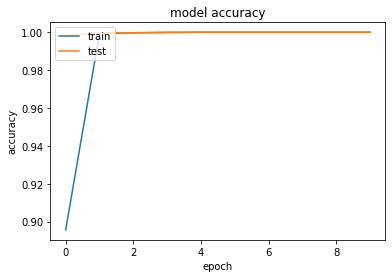

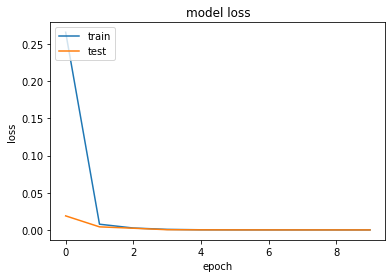

In [265]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()